In [1]:
import numpy as np
import os
from dipy.align import imwarp, metrics
from scipy.io import loadmat
import pickle
import matplotlib.pyplot as plt
path = '../../dataset/LPBA40/pair/'

In [3]:
with open(path+'1/data.pkl', 'rb') as f:
    tmp = pickle.load(f)
sta = tmp['sta']
mov = tmp['mov']
fwd = tmp['forward']
bwd = tmp['backward']

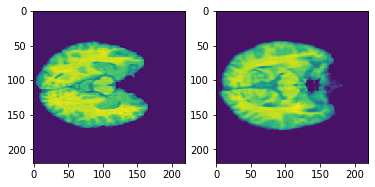

In [4]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(sta[:,:,110])
plt.subplot(122)
plt.imshow(mov[:,:,115])
plt.show()

In [30]:
def binp(img, x, y, z):
    val = 0
    xd = 1 if (np.ceil(x)==np.floor(x)) else (x-np.floor(x))/(np.ceil(x)-np.floor(x))
    yd = 1 if (np.ceil(y)==np.floor(y)) else (y-np.floor(y))/(np.ceil(y)-np.floor(y))
    zd = 1 if (np.ceil(z)==np.floor(z)) else (z-np.floor(z))/(np.ceil(z)-np.floor(z))
    for i in range(8):
        tmp = 1
        if i%2:
            tz = np.ceil(z)
            tmp *= zd
        else:
            tz = np.floor(z)
            tmp *= (1-zd)
        i /= 2
        if i%2:
            ty = np.ceil(y)
            tmp *= yd
        else:
            ty = np.floor(y)
            tmp *= (1-yd)
        i /= 2
        if i%2:
            tx = np.ceil(x)
            tmp *= xd
        else:
            tx = np.floor(x)
            tmp *= (1-xd)
        val += img[int(tx), int(ty), int(tz)]*tmp
    return val
            

In [39]:
for i in range(100, 105):
    for j in range(50, 55):
        for k in range(100, 101):
            ii = i - bwd[i, j, k, 0]
            jj = j - bwd[i, j, k, 1]
            kk = k - bwd[i, j, k, 2]
            print('pos:{:d},{:d},{:d}, mov:{:d}'.format(i, j, k, mov[i, j, k]))
            print('pos:{:f},{:f},{:f}, sta:{:f}'.format(ii, jj, kk, binp(sta, ii, jj, kk)))
            print()

pos:100,50,100, mov:1403
pos:100.031896,45.999752,102.284187, sta:134.131721

pos:100,51,100, mov:1036
pos:99.741534,47.351467,102.339323, sta:1819.088234

pos:100,52,100, mov:0
pos:99.437693,48.701045,102.380150, sta:1756.146535

pos:100,53,100, mov:0
pos:99.121407,50.049418,102.407211, sta:970.373251

pos:100,54,100, mov:0
pos:98.746291,51.337202,102.362895, sta:1712.172890

pos:101,50,100, mov:1289
pos:101.070485,45.799585,102.647882, sta:442.147572

pos:101,51,100, mov:909
pos:100.804407,47.160181,102.764121, sta:1091.959366

pos:101,52,100, mov:0
pos:100.526389,48.527213,102.854258, sta:1903.906101

pos:101,53,100, mov:0
pos:100.242308,49.900873,102.928438, sta:1481.168520

pos:101,54,100, mov:0
pos:99.901344,51.210554,102.906046, sta:1229.925206

pos:102,50,100, mov:1264
pos:102.084680,45.538558,102.989915, sta:317.176975

pos:102,51,100, mov:1129
pos:101.852014,46.916537,103.164496, sta:3376.134479

pos:102,52,100, mov:0
pos:101.604063,48.310657,103.303996, sta:1708.910967

pos:

In [43]:
fwd[50,50,110]

array([-8.981801 ,  1.005258 ,  3.5387192], dtype=float32)